In [45]:
from auxiliary.data.dataset_ht import HtDataset
from auxiliary.data import imaging
from auxiliary import values as v
from auxiliary.utils.colors import bcolors as bc

from nuclei_segmentation.processing import postprocessing

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [67]:
results = pd.read_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results.csv')
results

,test_name,dice,jaccard,#cells,correct,missing,over_segmented,under_segmented,confused
0,pipeline_2D_thr_0.2_norm_percentile_0_0,0.539105,0.536856,141.0,54.61,4.79,9.22,24.82,11.35
1,pipeline_2D_thr_0.2_norm_percentile_0_1,0.539105,0.536856,141.0,54.61,4.79,9.22,24.82,11.35
2,pipeline_2D_thr_0.2_norm_percentile_0_2,0.539105,0.536856,141.0,54.61,4.79,9.22,24.82,11.35
3,pipeline_2D_thr_0.2_norm_percentile_0_3,0.539105,0.536856,141.0,54.61,4.79,9.22,24.82,11.35
4,pipeline_2D_thr_0.2_norm_percentile_0_4,0.539105,0.536856,141.0,54.61,4.79,9.22,24.82,11.35
...,...,...,...,...,...,...,...,...,...
955,pipeline_3D_prob0.5_norm_percentile_4_11,0.516345,0.580643,132.0,68.18,8.94,6.06,22.73,3.03
956,pipeline_3D_prob0.5_norm_percentile_4_12,0.516345,0.580643,132.0,68.18,8.94,6.06,22.73,3.03
957,pipeline_3D_prob0.5_norm_percentile_4_13,0.516345,0.580643,132.0,68.18,8.94,6.06,22.73,3.03
958,pipeline_3D_prob0.5_norm_percentile_4_14,0.516345,0.580643,132.0,68.18,8.94,6.06,22.73,3.03


In [68]:
results = pd.read_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results.csv')
cols_to_adjust = results.columns[4:]

for col in cols_to_adjust:
    results[col] = (((results[col] * results['#cells']) / 100) / 188)
    
results['labels_ratio'] = results['#cells'] / 188
    
# for col in cols_to_adjust:
#     results[col] = results[col] / 100
    
results.to_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results_adjusted.csv', index=False)
results

,test_name,dice,jaccard,#cells,correct,missing,over_segmented,under_segmented,confused,labels_ratio
0,pipeline_2D_thr_0.2_norm_percentile_0_0,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000
1,pipeline_2D_thr_0.2_norm_percentile_0_1,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000
2,pipeline_2D_thr_0.2_norm_percentile_0_2,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000
3,pipeline_2D_thr_0.2_norm_percentile_0_3,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000
4,pipeline_2D_thr_0.2_norm_percentile_0_4,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000
...,...,...,...,...,...,...,...,...,...,...
955,pipeline_3D_prob0.5_norm_percentile_4_11,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128
956,pipeline_3D_prob0.5_norm_percentile_4_12,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128
957,pipeline_3D_prob0.5_norm_percentile_4_13,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128
958,pipeline_3D_prob0.5_norm_percentile_4_14,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128


In [69]:
metrics_pca = results.columns[1:]
metrics_pca = metrics_pca.drop(['#cells'])

X = results[metrics_pca].copy()

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

results['quality_score'] = -X_pca.flatten()
results['quality_score_normalized'] = (results['quality_score'] - results['quality_score'].min()) / (results['quality_score'].max() - results['quality_score'].min())

results.to_csv(v.data_path + 'SegQA/Segmentation/Nuclei/QC_CROP/Stats/results_adjusted.csv', index=False)
results

,test_name,dice,jaccard,#cells,correct,missing,over_segmented,under_segmented,confused,labels_ratio,quality_score,quality_score_normalized
0,pipeline_2D_thr_0.2_norm_percentile_0_0,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000,0.33032,0.964743
1,pipeline_2D_thr_0.2_norm_percentile_0_1,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000,0.33032,0.964743
2,pipeline_2D_thr_0.2_norm_percentile_0_2,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000,0.33032,0.964743
3,pipeline_2D_thr_0.2_norm_percentile_0_3,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000,0.33032,0.964743
4,pipeline_2D_thr_0.2_norm_percentile_0_4,0.539105,0.536856,141.0,0.409575,0.035925,0.069150,0.186150,0.085125,0.750000,0.33032,0.964743
...,...,...,...,...,...,...,...,...,...,...,...,...
955,pipeline_3D_prob0.5_norm_percentile_4_11,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128,0.38691,0.988231
956,pipeline_3D_prob0.5_norm_percentile_4_12,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128,0.38691,0.988231
957,pipeline_3D_prob0.5_norm_percentile_4_13,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128,0.38691,0.988231
958,pipeline_3D_prob0.5_norm_percentile_4_14,0.516345,0.580643,132.0,0.478711,0.062770,0.042549,0.159594,0.021274,0.702128,0.38691,0.988231


In [70]:
loadings = -pca.components_[0]
metric_names = metrics_pca
loadings_df = pd.DataFrame({'Metric': metric_names, 'Loading': loadings})

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_[0]
print(f"Explained Variance by the First Principal Component: {explained_variance * 100:.2f}%")

# Display the loadings
print("\nLoadings (Contribution of each metric to the principal component):")
print(loadings_df)

Explained Variance by the First Principal Component: 98.63%

Loadings (Contribution of each metric to the principal component):
            Metric   Loading
0             dice  0.062040
1          jaccard  0.008579
2          correct  0.100171
3          missing -0.017579
4   over_segmented -0.761246
5  under_segmented  0.064500
6         confused -0.036490
7     labels_ratio -0.633045


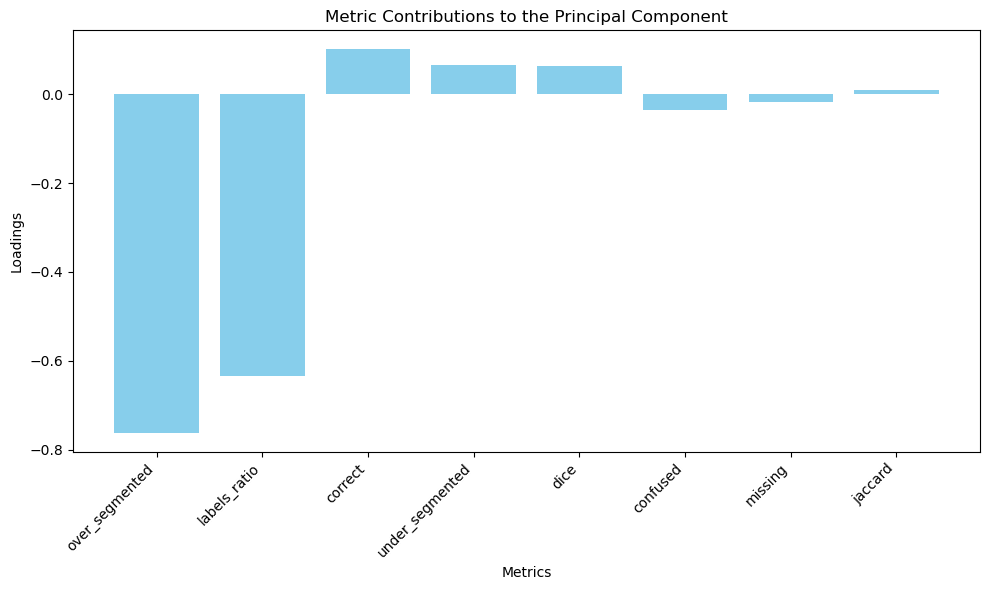

In [71]:
import matplotlib.pyplot as plt

# Sort the loadings by absolute value for better visualization
loadings_df['abs_loading'] = loadings_df['Loading'].abs()
loadings_df_sorted = loadings_df.sort_values('abs_loading', ascending=False)

# Plot the loadings
plt.figure(figsize=(10, 6))
plt.bar(loadings_df_sorted['Metric'], loadings_df_sorted['Loading'], color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Loadings')
plt.title('Metric Contributions to the Principal Component')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
